Implement Gradient Descent Algorithm  to find the boundary of a small dataset

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# plotting functions

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

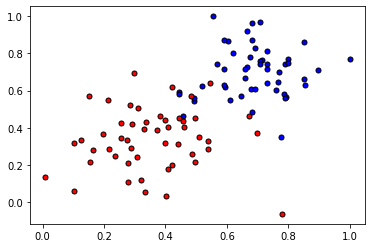

In [17]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [18]:
# sigmooid function
def sigmoid(x):

    return 1/(1+np.exp(-x))

In [19]:
# output prediction
"""
y_hat = sigmoid(w1x1 + w2x2 + b)
"""

def output_formula(features, weights, bias):

    y_hat = sigmoid(np.dot(features, weights) + bias)
    return y_hat


In [20]:
# Error (log-loss) formula
"""
error(y, y_hat) = -ylog(y_hat) - (1-y)log(1-y_hat)
"""

def error_formula(y, output):
    error = -y * (np.log(output)) - (1-y) * (np.log(1-output))
    return error

In [21]:
# Gradient descent step
""" 
w_i <- w_i + alpha (y - y_hat) x
b <- b + alpha ( y - y_hat )
"""

def update_weights(x, y , weights, bias, learnrate):

    y_hat = output_formula(x, weights, bias)
    error_change = y - y_hat
    
    weights = weights + learnrate * (error_change) * x
    bias = bias + learnrate * (error_change)

    return weights, bias

In [29]:
# train function

np.random.seed(1)
epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines = False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None

    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    for e in range(epochs):

        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)

        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5
            
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

    
    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.6329563188868849
Accuracy:  0.58

========== Epoch 10 ==========
Train loss:  0.5604730760430457
Accuracy:  0.71

========== Epoch 20 ==========
Train loss:  0.5072683707956522
Accuracy:  0.79

========== Epoch 30 ==========
Train loss:  0.4649557600088179
Accuracy:  0.85

========== Epoch 40 ==========
Train loss:  0.430728365762723
Accuracy:  0.89

========== Epoch 50 ==========
Train loss:  0.4026079936596201
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.3791663254563416
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3593638044812976
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.34243470579074164
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.32780706050077973
Accuracy:  0.93


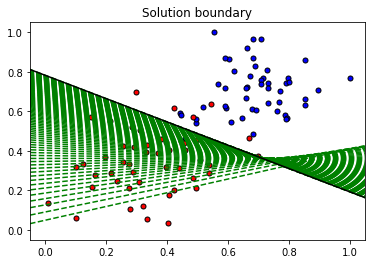

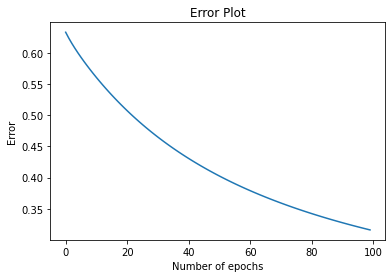

In [32]:
train(X, y, epochs, learnrate, True)